# Kickstarter Projects 

## Factors Associated with Successful Project 


In [329]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from scipy import stats

This project explored a dataset of about 378660 Kickstarter projects. Kickstarter is one of the popular crowdfunding platforms along with Indiegogo. The dataset was obtained from https://www.kaggle.com/kemical/kickstarter-projects. The explored datset contains data about projects from 2009 (when the platfrom was launched) up to 2018. It has a few projects from 1970 (which I will drop later). 

In [104]:
df_kaggel_2018 = pd.read_csv('data_2/ks-projects-201801.csv')
#df_kaggel_2018 = df_kaggel_2018.country.replace(to_replace='N,0"', value='NO')

In [105]:
df_kaggel_2018.ID.dtype

dtype('int64')

In [108]:
len_pr = len(df_kaggel_2018)
duplicates = len(df_kaggel_2018[df_kaggel_2018.duplicated(subset='ID')])
print(duplicates)
print("From {} projects in the dataset there are not duplicates".format(len_pr))

0
From 378661 projects in the dataset there are not duplicates


In [113]:
df_kaggel_2018['launched'] = pd.to_datetime(df_kaggel_2018['launched'], errors='coerce')

In [114]:
first_pr = min(df_kaggel_2018.launched).strftime('%d %B %Y')
last_pr = max(df_kaggel_2018.launched).strftime('%d %B %Y')
print("The dataset contains projects added to Kickstarter between {} and {}.".format(first_pr, last_pr))

The dataset contains projects added to Kickstarter between 01 January 1970 and 02 January 2018.


In [5]:
df_kaggel_2018.launched.dtype

dtype('<M8[ns]')

In [8]:
df_kaggel_2018.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


In [9]:
df_kaggel_2018.name.dtype

dtype('O')

In [10]:
df_kaggel_2018['name'] = df_kaggel_2018['name'].astype(str)

In [11]:
#df_kaggel_2018['name'] = df_kaggel_2018['name'].str.split().str.len()

In [12]:
#df_kaggel_2018['name']

In [14]:
df_kaggel_2018.set_index('ID', inplace=True)
df_kaggel_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Exploratory Data Analysis

Exploratory data analysis will help to find useful insights.

In [15]:
# Summary for the numerical data
df_kaggel_2018.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


#### Key Finds

In [322]:
Total_amount_goal = df_kaggel_2018.usd_goal_real.sum()
print("Total goal {0:,.0f}".format(Total_amount_goal))

Total goal 13,767,829,762


In [314]:
Total_amount_goal = df_kaggel_2018.usd_goal_real.sum() 
print("\nThe total amount of money that projects have aimed to raise is ${0:,.0f}".format(df_kaggel_2018.usd_goal_real.sum()))
print("The total amount of money pledged by backers is ${0:,.0f}".format(df_kaggel_2018.usd_pledged_real.sum()))
print("The total amount of money pledged by backers to successful projects is ${0:,.0f}".format(sum(df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful'].usd_pledged_real)))

print("The total amount of money pledged by backers to failed projects is ${0:,.0f}".format(sum(df_kaggel_2018.loc[df_kaggel_2018['state'] == 'failed'].usd_pledged_real)))

print("\nThe total number of successful or failed projects launched on Kickstarter is: {0:,}".format(len(df_kaggel_2018)))
print("The total number of projects which were successfully funded is: {0:,}".format(len(df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful'])))
print(f"The proportion of completed projects which were successfully funded is: {int(round((len(df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful'])/len(df_kaggel_2018))*100,0))}%")

print("\nThe mean project fundraising goal is ${0:,.0f}".format(df_kaggel_2018.usd_goal_real.mean()))
print("The mean amount pledged per project is ${0:,.0f}".format(df_kaggel_2018.usd_pledged_real.mean()))
print("The mean amount pledged per successful project is ${0:,.0f}".format(df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful'].usd_pledged_real.mean()))
print("The mean amount pledged per failed project is ${0:,.0f}".format(df_kaggel_2018.loc[df_kaggel_2018['state'] == 'failed'].usd_pledged_real.mean()))
      
print("\nThe mean number of backers per project is", int(round(df_kaggel_2018.backers.mean(),0)))


The total amount of money that projects have aimed to raise is $13,767,829,762
The total amount of money pledged by backers is $3,297,997,512
The total amount of money pledged by backers to successful projects is $3,036,889,046
The total amount of money pledged by backers to failed projects is $261,108,466

The total number of successful or failed projects launched on Kickstarter is: 331,675
The total number of projects which were successfully funded is: 133,956
The proportion of completed projects which were successfully funded is: 40%

The mean project fundraising goal is $41,510
The mean amount pledged per project is $9,943
The mean amount pledged per successful project is $22,671
The mean amount pledged per failed project is $1,321

The mean number of backers per project is 116


#### How Projects growth changed between 2009-2018

The graph below shows the number of projects launched on Kickstarter from 2009 to end of 2017 (2018 is not included).
The first graph is showing growing numbers each year and the second graph is showing growing numbers within the same period of time, but each month. 

- The number of projects steadily grows from 2009 up to the middle of 2014. Projects started growing fast in 2014 and decreasing between 20015 and 2016. 
- On October 31 of 2012 Kickstarter opened projects based in the UK, followed by Canada in 2013, Australia and New Zealand and etc. 
- I am assuming a few reasons for such growth and then decrease: 1) looks like by 2014 Kickstarter reached the point where the wider audience is fully aware of its existence after step-by-step international launch. As a result it attracts more creators and backers. 2) Kickstarter added another four currencies to its platform and opened projects to five new countries: Netherlands, Sweden, Denmark, Norway and Ireland.
3) in 2014, Kickstarter made a lot of changes to their website, changes that making data collection not as straightforward as before. This factor might have impacted. 


Text(0.5, 1.0, 'Number of Kickstarter projects launched between 2009-2018')

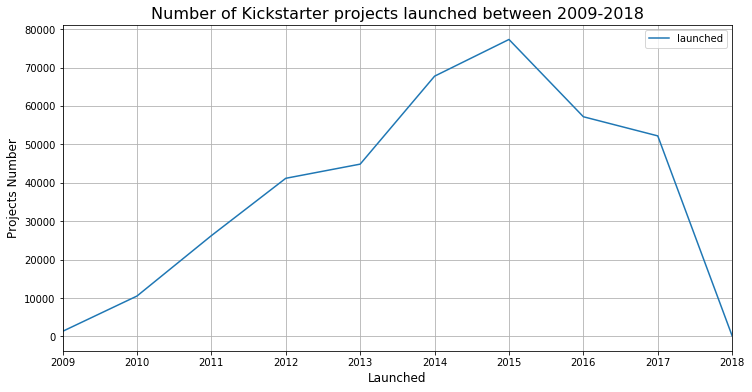

In [140]:
launched_per_year_2018 = pd.DatetimeIndex(df_kaggel_2018["launched"]).year
launched_per_year_2018 = launched_per_year_2018.value_counts()
launched_per_year_2018_2 = launched_per_year_2018.drop(launched_per_year_2018.index[-1])
launched_per_year_2018_2 = launched_per_year_2018_2.reset_index()
launched_per_year_2018_2 = launched_per_year_2018_2.sort_values(by=['index'])

ax = launched_per_year_2018_2.plot(x ='index', y =['launched'], figsize=(12, 6), grid=True)
ax.set_ylabel('Projects Number', fontsize=12)
ax.set_xlabel('Launched', fontsize=12)
#axes(color='b', ls = '-.', lw = 0.25)
ax.set_title('Number of Kickstarter projects launched between 2009-2018', fontsize=16)

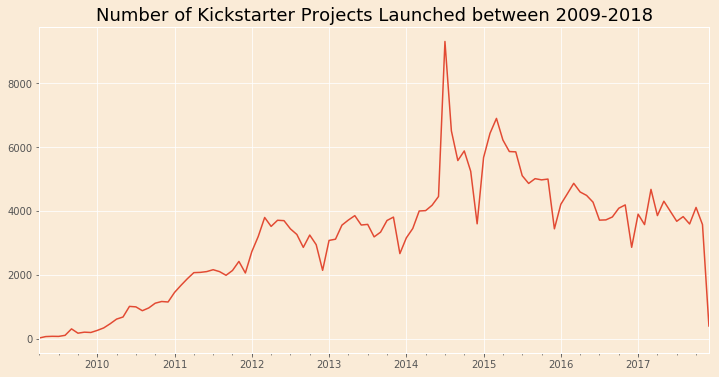

In [370]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
#axe = axes.ravel()
fig.patch.set_facecolor('antiquewhite')

ax = df_kaggel_2018.set_index('launched').category.resample('M').count().plot()
#ax = df_kaggel_2018.groupby('main_category').pledge_per_backer.median().plot(kind='bar', color=plt.cm.Paired(np.arange(len(main_category_2018))))
#df_kaggel_2018.groupby('main_category').usd_pledged_real.median().plot(ax=axe[0], kind='bar', title ="Median Pledged per Category", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))
ax.set_facecolor('antiquewhite')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Number of Kickstarter Projects Launched between 2009-2018', fontsize=18)
#ax.xlim('2009-01-01', '2018-01-02')

plt.show()

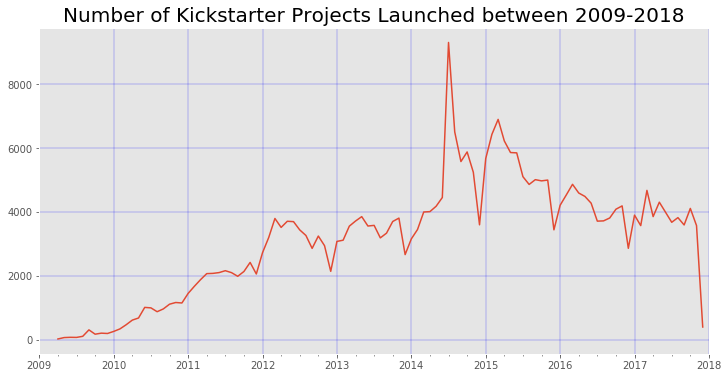

In [358]:
plt.figure(figsize=(12,6))
df_kaggel_2018.set_index('launched').category.resample('M').count().plot() 
plt.xlim('2009-01-01', '2018-01-02')
plt.xlabel('')
plt.ylabel('')
plt.title('Number of Kickstarter Projects Launched between 2009-2018', fontsize=20)
plt.grid(color='b', linestyle='-', linewidth=0.25)
plt.show()

The bar charts below show failed vs successful projects between 2009 and 2018 (2018 is not included). We can see that starting from 2013 the number and of failed and successful projects start becoming even. 

In [202]:
success_year_2018

,index,launched
0,2014,21107
1,2015,20971
2,2013,19415
3,2016,18766
4,2017,18462
5,2012,17892
6,2011,12171
7,2010,4593
8,2009,579


In [203]:
failed_year_2018

,index,launched
0,2015,44301
1,2014,38199
2,2016,30526
3,2017,24957
4,2013,21686
5,2012,20588
6,2011,11878
7,2010,4984
8,2009,600


In [19]:
success_projects_2018 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful'])
success_year_2018 = pd.DatetimeIndex(success_projects_2018['launched']).year
success_year_2018 = success_year_2018.value_counts()
success_year_2018 = success_year_2018.reset_index()
failed_projects_2018 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'failed'])
failed_year_2018 = pd.DatetimeIndex(failed_projects_2018['launched']).year
failed_year_2018 = failed_year_2018.value_counts()
failed_year_2018 = failed_year_2018.reset_index()

In [204]:
success_failed

,successful,failed
0,21107,44301
1,20971,38199
2,19415,30526
3,18766,24957
4,18462,21686
5,17892,20588
6,12171,11878
7,4593,4984
8,579,600


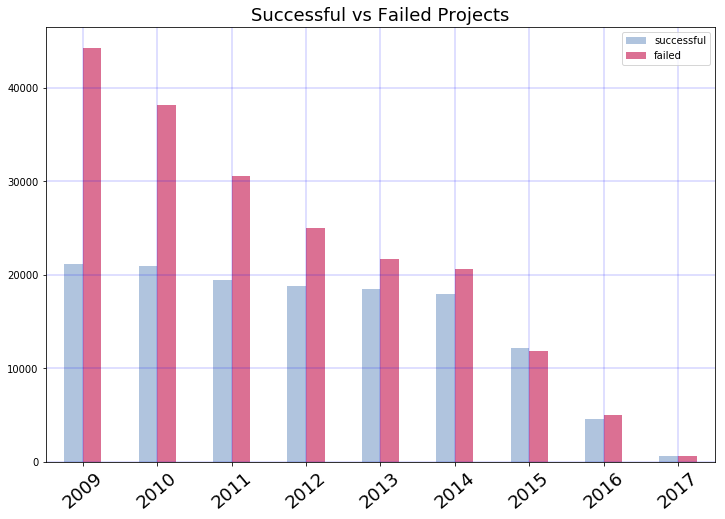

In [174]:
success_failed.plot.bar(color=['lightsteelblue', 'palevioletred'], figsize=(12,8))
plt.title('Successful vs Failed Projects', fontsize =18)
plt.xlabel('')
plt.grid(color='b', linestyle='-', linewidth=0.25)
plt.xticks(np.arange(9), list(range(2009,2018)), fontsize=18, rotation=40)

plt.show()

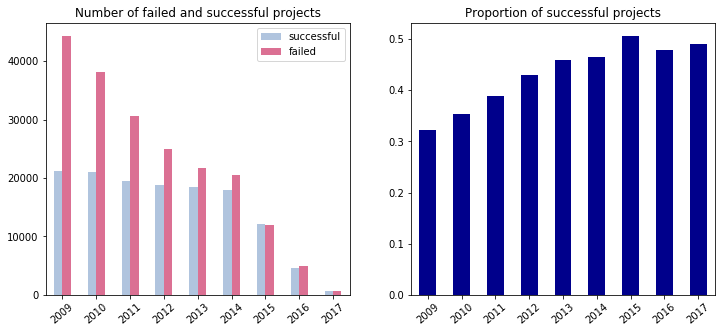

In [171]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

success_failed = pd.DataFrame({'successful': success_year_2018['launched'].values,
                   'failed': failed_year_2018['launched'].values})

success_failed.plot.bar(ax=ax[0], color=['lightsteelblue', 'palevioletred'])
ax[0].set_title('Number of failed and successful projects')
ax[0].set_xlabel('')
ax[0].set_xticklabels(list(range(2009,2018)), rotation=40)

success_failed.div(success_failed.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax[1], color='darkblue')
ax[1].set_title('Proportion of successful projects')
ax[1].set_xlabel('')
ax[1].set_xticklabels(list(range(2009,2018)), rotation=40)

plt.show()


#### The difference between successful and failed projects

The graphs below show how various features differ between failed and successful projects.

1. It looks like successful projects are having smaller goals - the median amount asked by successful projects is half almost of what failed projects are asking for.
2. There is a big difference in the median amount pledged per project, which is quite higher than the median amount requested. Suggesting that if if projects meet their goal they attract more attention and as a result more funding.
3. There is a large difference between failed and successful in terms of amount pledged and the number of backers. I am assuming once potential supporters see that a project is picking up and doing well, they are willing to fund and be part of the future success.
4. Campaign length and the project name length doesn't differ much, campaigns are slightly shorter for successful projects. 


In [215]:
# Adding a column - counting an average amount pledged per backer 
# Some values are NaN and for the future work I will replace them with 0

df_kaggel_2018['pledged_per_backer'] = round(df_kaggel_2018['usd_pledged_real']/df_kaggel_2018['backers'],2)
df_kaggel_2018['pledged_per_backer'] = df_kaggel_2018['pledge_per_backer'].fillna(0)

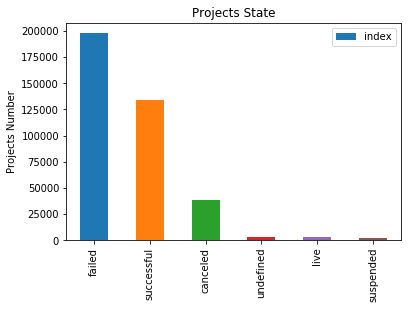

In [22]:
state_2018 = df_kaggel_2018["state"].value_counts()
ax = state_2018.plot(kind='bar', label='index', color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5'])
ax.set_ylabel('Projects Number')
ax.set_title('Projects State')
ax.legend()
plt.show()

Projects have more than two states (failed or successful). I am planning to drop other raws and plot only failed and successful projects below and in the futures graphs. 

In [183]:
df_kaggel_2018 = df_kaggel_2018[df_kaggel_2018['state'].isin(['successful', 'failed'])]

#Working with datetime data - changing types, finding all possible information from existing data

df_kaggel_2018['launched_at'] = pd.to_datetime(df_kaggel_2018['launched']).dt.normalize()
df_kaggel_2018['deadline_2'] = pd.to_datetime(df_kaggel_2018['deadline'], errors='coerce')
df_kaggel_2018['campaign_number_days'] = df_kaggel_2018['deadline_2'] - df_kaggel_2018['launched_at'] #campaign length 
df_kaggel_2018['number_days'] = df_kaggel_2018['campaign_number_days'].dt.round('d').dt.days

df_kaggel_2018['launched_month'] = df_kaggel_2018['launched_at'].dt.month_name()
df_kaggel_2018['deadline_day'] = df_kaggel_2018['deadline_2'].dt.weekday_name
df_kaggel_2018['day_launched'] = df_kaggel_2018['launched_at'].dt.weekday_name

In [39]:
#df_kaggel_2018['campaign_number_days'] = df_kaggel_2018['campaign_number_days'].dt.day
df_kaggel_2018.campaign_number_days.dtype

dtype('<m8[ns]')

In [189]:
print(type(projects_two_states))

<class 'pandas.core.series.Series'>


In [188]:
print(type(median_success_fail))

<class 'pandas.core.frame.DataFrame'>


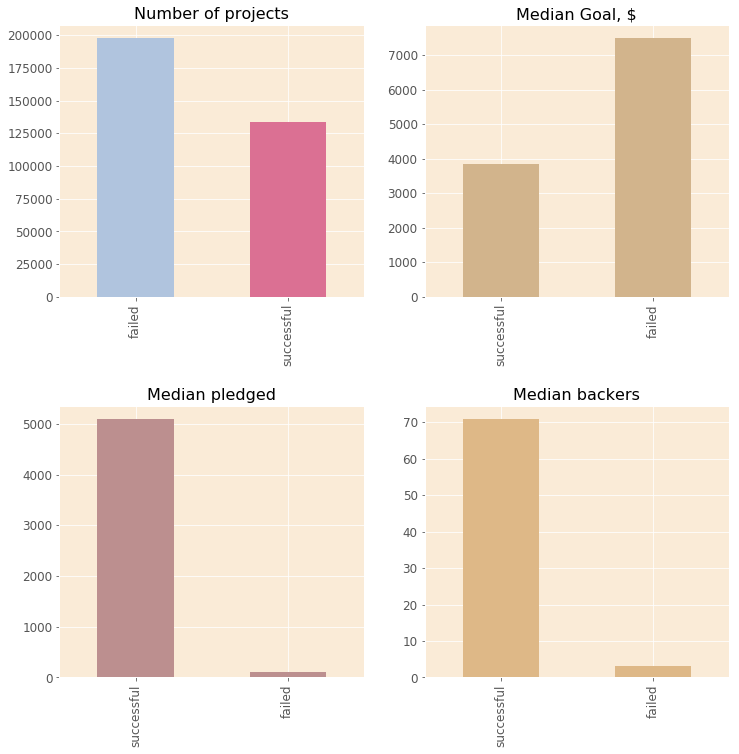

In [354]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axe = axes.ravel()

state_2018.reset_index()
projects_two_states = state_2018.drop(['canceled', 'undefined', 'live', 'suspended'])
projects_two_states.plot(ax=axe[0], color=['lightsteelblue', 'palevioletred'], kind='bar', grid=True, legend=False, label='index', fontsize=12)
axe[0].set_title('Number of projects', fontsize=16)
#axe[0].set_facecolor('xkcd:salmon')
axe[0].set_facecolor('antiquewhite')

median_goal_success_2018 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful']).usd_goal_real.median()
median_goal_failed_2018 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'failed']).usd_goal_real.median()
median_success_fail = (pd.DataFrame({"successful":[3837.74], "failed": [7500.0]})).T
median_success_fail.plot(ax=axe[1], color=['tan', 'palevioletred'], kind='bar', grid=True, legend=False, label='index', fontsize=12)
axe[1].set_title('Median Goal, $', fontsize=16)
axe[1].set_facecolor('antiquewhite')

median_pedged_failed_2018 = failed_projects_2018.usd_pledged_real.median()
median_pledged_success_2018 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful']).usd_pledged_real.median()
median_pledged_success_fail = (pd.DataFrame({"successful":[5107.25], "failed": [100.0]})).T
median_pledged_success_fail.plot(ax=axe[2], color=['rosybrown', 'palevioletred'], kind='bar', grid=True, legend=False, label='index', fontsize=12)
axe[2].set_title('Median pledged', fontsize=16)
axe[2].set_facecolor('antiquewhite')


median_backers_failed_2018 = failed_projects_2018.backers.median()
median_backers_success_2018 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful']).backers.median()
median_backers_success_fail = (pd.DataFrame({"successful":[71.0], "failed": [3.0]})).T
median_backers_success_fail.plot(ax=axe[3], kind='bar', color=['burlywood', 'palevioletred'], grid=True, legend=False, label='index', fontsize=12)
axe[3].set_title('Median backers', fontsize=16)
axe[3].set_facecolor('antiquewhite')

#colours = {"successful": 'burlywood', "failed": 'palevioletred'}
#median_backers_success_fail.plot(ax=axe[3], kind='bar', color=plotdata['median_backers_success_fail'].replace(colours), grid=True, legend=False, label='index', fontsize=12)

fig.subplots_adjust(hspace=0.4)
plt.show()

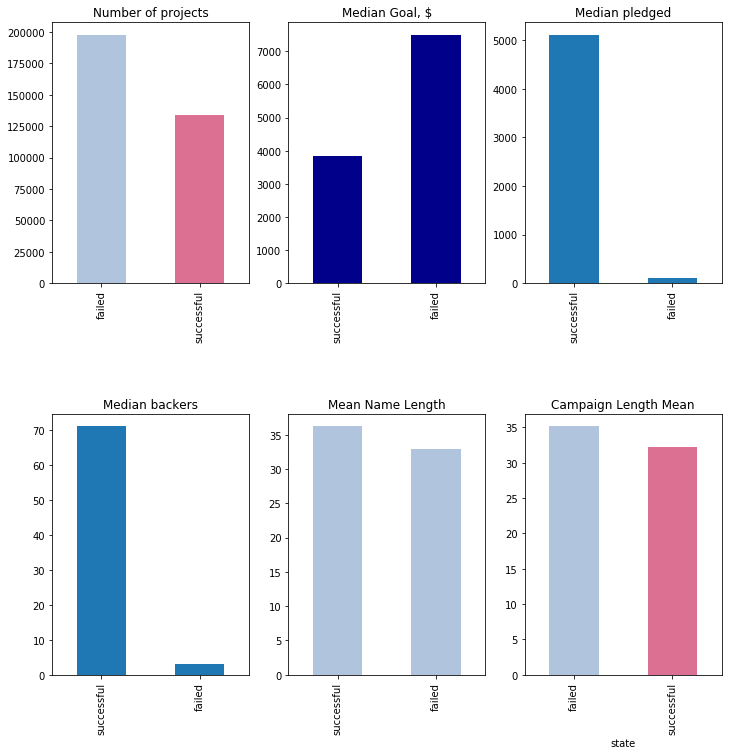

In [181]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))
axe = axes.ravel()

state_2018.reset_index()
projects_two_states = state_2018.drop(['canceled', 'undefined', 'live', 'suspended'])
projects_two_states.plot(ax=axe[0], color=['lightsteelblue', 'palevioletred'], kind='bar', legend=False, label='index')
axe[0].set_title('Number of projects')

median_pedged_failed_2018 = failed_projects_2018.usd_pledged_real.median()
median_pledged_success_2018 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful']).usd_pledged_real.median()
median_pledged_success_fail = (pd.DataFrame({"successful":[5107.25], "failed": [100.0]})).T
median_pledged_success_fail.plot(ax=axe[2], kind='bar', legend=False, label='index')
axe[2].set_title('Median pledged')

median_backers_failed_2018 = failed_projects_2018.backers.median()
median_backers_success_2018 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful']).backers.median()
median_backers_success_fail = (pd.DataFrame({"successful":[71.0], "failed": [3.0]})).T
median_backers_success_fail.plot(ax=axe[3], kind='bar', legend=False, label='index')
axe[3].set_title('Median backers', fontsize=16)


median_goal_success_2018 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful']).usd_goal_real.median()
median_goal_failed_2018 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'failed']).usd_goal_real.median()
median_success_fail = (pd.DataFrame({"successful":[3837.74], "failed": [7500.0]})).T
median_success_fail.plot(ax=axe[1], color=['darkblue', 'darkred'], kind='bar', legend=False, label='index')
axe[1].set_title('Median Goal, $', fontsize=16)


failed_projects_name_length_mean_2018 = (failed_projects_2018['name'].astype('str')).apply(len).mean()
success_projects_name_length_mean_2018 = (success_projects_2018['name'].astype('str')).apply(len).mean()
mean_name_length_success_fail_2018 = (pd.DataFrame({"successful":[36.24413986682194], "failed": [32.84871964758066]})).T
mean_name_length_success_fail_2018.plot(ax=axe[4], color=['lightsteelblue', 'palevioletred'], kind='bar', legend=False, label='index')
axe[4].set_title('Mean Name Length', fontsize=16)

df_kaggel_2018.groupby('state').number_days.mean().plot(ax=axe[5], kind='bar', color=['lightsteelblue', 'palevioletred'])
axe[5].set_title('Campaign Length Mean')

fig.subplots_adjust(hspace=0.5)
plt.show()

In [49]:
df_kaggel_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,...,usd_pledged_real,usd_goal_real,pledge_per_backer,launched_at,deadline_2,campaign_number_days,launched_month,deadline_day,day_launched,number_days
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,...,0.0,1533.95,0.00,2015-08-11,2015-10-09,59 days,August,Friday,Tuesday,59
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,...,2421.0,30000.00,161.40,2017-09-02,2017-11-01,60 days,September,Wednesday,Saturday,60
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,...,220.0,45000.00,73.33,2013-01-12,2013-02-26,45 days,January,Tuesday,Saturday,45
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,...,1.0,5000.00,1.00,2012-03-17,2012-04-16,30 days,March,Monday,Saturday,30
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,...,52375.0,50000.00,233.82,2016-02-26,2016-04-01,35 days,February,Friday,Friday,35


#### Categories of projects launched and which are more successful

1. There are 15 project main categories (which are divided into more narrow categoris), where film & video is the most  popular, followed by music, publishing, and games.
2. If we look at the median goal we can see that technology projects show the highest goals, followed by design, food, and games.
3. But we can see that technology projects have very low median pledged amount. Technology may ask for bigger goal (since innovations in tech are more expensive), also there is lot of competition from bigger companies (it involves not only actual technology, but also creative product design). 
4. Design, dance, games, comics, and theatre projects get the highest funding based on info about median pledged amount.
5. We can see that in terms of median backers the most popular categories are dance, theatre, design, film&video, music, fashion, food, games and journalism, crafts and technology are the least popular (the reason might be their funding goals).
6. Comics and games are attracting the most amount of backers, but less amount pledged per backer.
7. Dance, design and film & video get more money per backer.

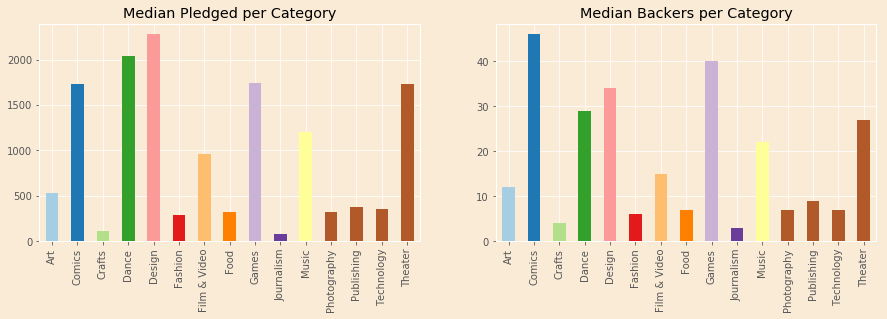

In [362]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
axe = axes.ravel()
fig.patch.set_facecolor('antiquewhite')


df_kaggel_2018.groupby('main_category').usd_pledged_real.median().plot(ax=axe[0], kind='bar', title ="Median Pledged per Category", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))
axe[0].set_facecolor('antiquewhite')
axe[0].set_xlabel('')

df_kaggel_2018.groupby('main_category').backers.median().plot(ax=axe[1], kind='bar', title ="Median Backers per Category", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))
axe[1].set_facecolor('antiquewhite')
axe[1].set_xlabel('')
plt.show()


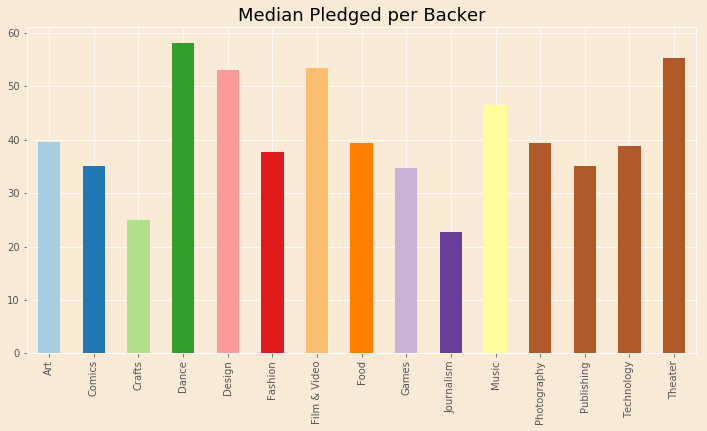

In [371]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
#axe = axes.ravel()
fig.patch.set_facecolor('antiquewhite')

ax = df_kaggel_2018.groupby('main_category').pledge_per_backer.median().plot(kind='bar', color=plt.cm.Paired(np.arange(len(main_category_2018))))
#df_kaggel_2018.groupby('main_category').usd_pledged_real.median().plot(ax=axe[0], kind='bar', title ="Median Pledged per Category", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))
ax.set_facecolor('antiquewhite')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Median Pledged per Backer', fontsize=18)


plt.show()

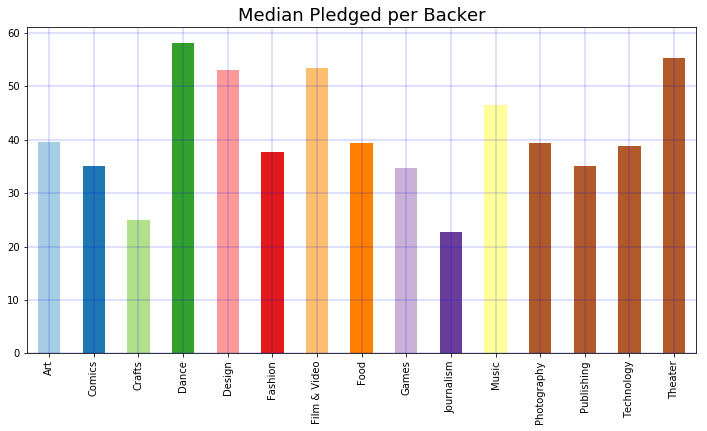

In [309]:
df_kaggel_2018.groupby('main_category').pledge_per_backer.median().plot(kind='bar', color=plt.cm.Paired(np.arange(len(main_category_2018))), figsize=(12,6))

plt.title('Median Pledged per Backer', fontsize =18)
plt.xlabel('')
plt.grid(color='b', linestyle='-', linewidth=0.25)

plt.show()



In [286]:
proportion_success = df_kaggel_2018.set_index('main_category').state
proportion_success = pd.get_dummies(proportion_success)
proportion_success = proportion_success.groupby('main_category').sum()

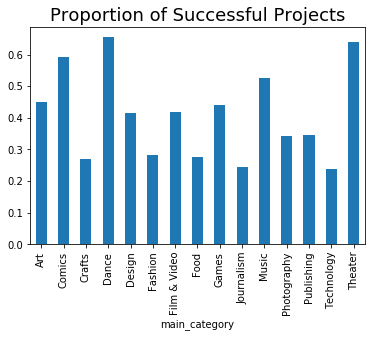

In [289]:
proportion_success.div(proportion_success.sum(axis=1), axis=0).successful.plot(kind='bar')
plt.title('Proportion of Successful Projects', fontsize = 18)

main_category_2018.plot(ax=axe[0], kind = 'bar', title ="Project Categories", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))



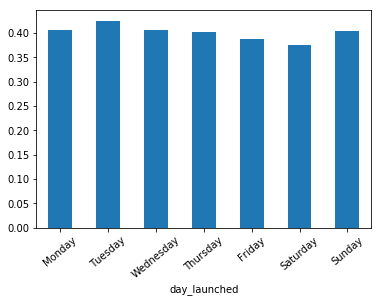

In [234]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = pd.get_dummies(df_kaggel_2018.set_index('day_launched').state).groupby('day_launched').sum()
day_df.div(day_df.sum(axis=1), axis=0).successful.reindex(weekdays).plot(kind='bar', rot=40)

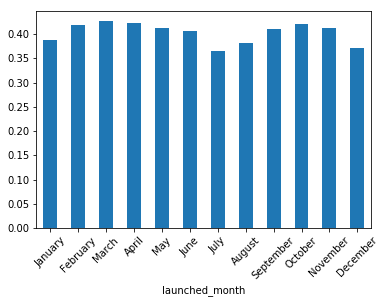

In [236]:
month_df = pd.get_dummies(df_kaggel_2018.set_index('launched_month').state).groupby('launched_month').sum()
months = list(calendar.month_name)[1:]
month_df.div(month_df.sum(axis=1), axis=0).successful.reindex(months).plot(kind='bar', rot=45)

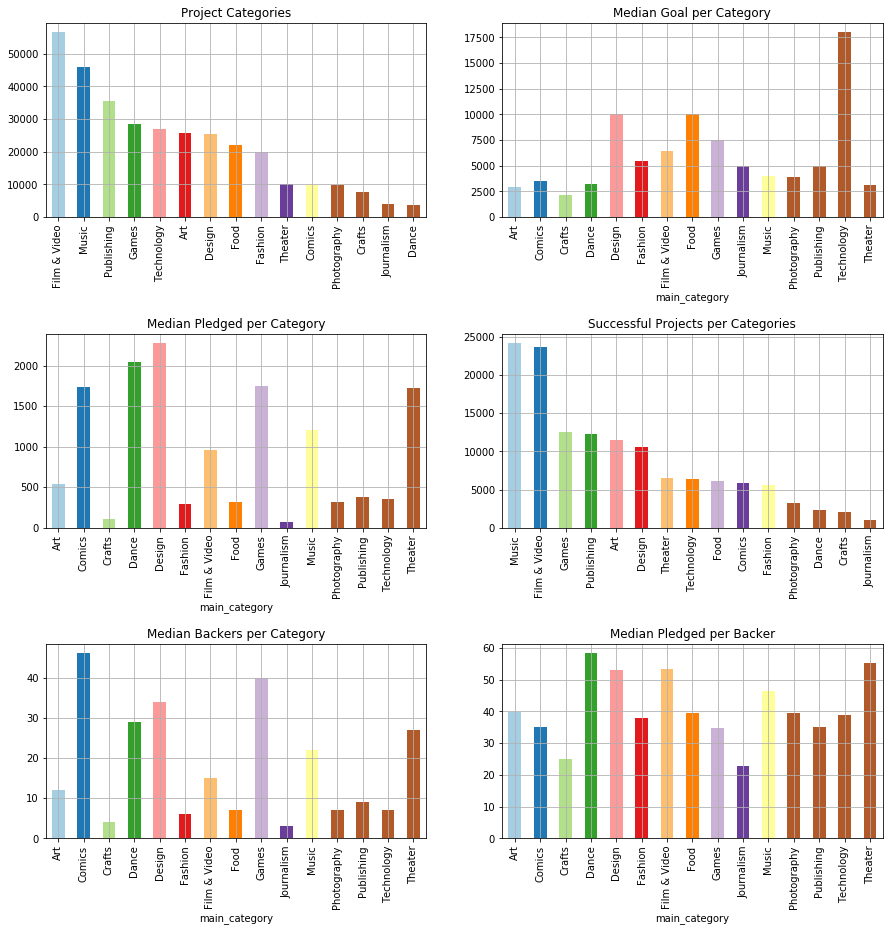

In [223]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axe = axes.ravel()

main_category_2018 = df_kaggel_2018["main_category"].value_counts()
main_category_2018.plot(ax=axe[0], kind = 'bar', title ="Project Categories", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('main_category').usd_goal_real.median().plot(ax=axe[1], kind='bar', title ="Median Goal per Category", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('main_category').usd_pledged_real.median().plot(ax=axe[2], kind='bar', title ="Median Pledged per Category", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

success_category = success_projects_2018['main_category'].value_counts()
success_category.plot(ax=axe[3], kind = 'bar', title ="Successful Projects per Categories", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('main_category').backers.median().plot(ax=axe[4], kind='bar', title ="Median Backers per Category", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('main_category').pledged_per_backer.median().plot(ax=axe[5], kind='bar', title ="Median Pledged per Backer", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

fig.subplots_adjust(hspace=0.6)
plt.show()

#### Projects origin 

- Most of the projects are coming from the US following by the UK. The number of US projects is much higher than from other countries. is six times more than projects from other countries.
- If we look at the most amount of backers, pledged amount and median pledged Hong Kong is the most successful country. 

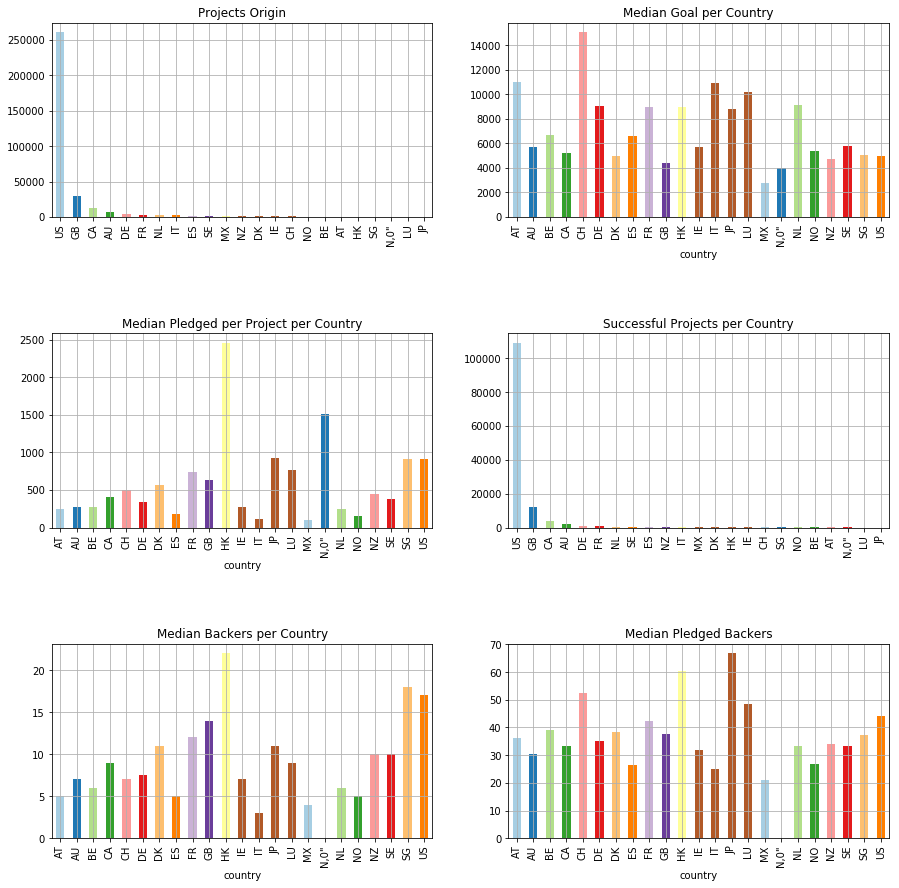

In [53]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axe = axes.ravel()

projects_distribution_2018 = df_kaggel_2018["country"].value_counts()
projects_distribution_2018.plot(ax=axe[0], kind='bar', label='index', title ='Projects Origin', grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('country').usd_goal_real.median().plot(ax=axe[1], kind='bar', title ="Median Goal per Country", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('country').usd_pledged_real.median().plot(ax=axe[2], kind='bar', title ="Median Pledged per Project per Country", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

success_country = success_projects_2018['country'].value_counts()
success_country.plot(ax=axe[3], kind = 'bar', title ="Successful Projects per Country", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('country').backers.median().plot(ax=axe[4], kind='bar', title ="Median Backers per Country", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('country').pledge_per_backer.median().plot(ax=axe[5], kind='bar', title ="Median Pledged Backers", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))


fig.subplots_adjust(hspace=0.6)
plt.show()

#### Project Launch Weekday

1. Tuesday is the best day to launch a project. It is the most popular launch day, and there is the highest amount of successful projects launched on Tuesday. Tuesday is the most successful day in all categories - amoutn of backers, the highest median pledged per backer, and the highest median pledge amount.
2. Saturday and Sunday are the least popular days for any project activities.

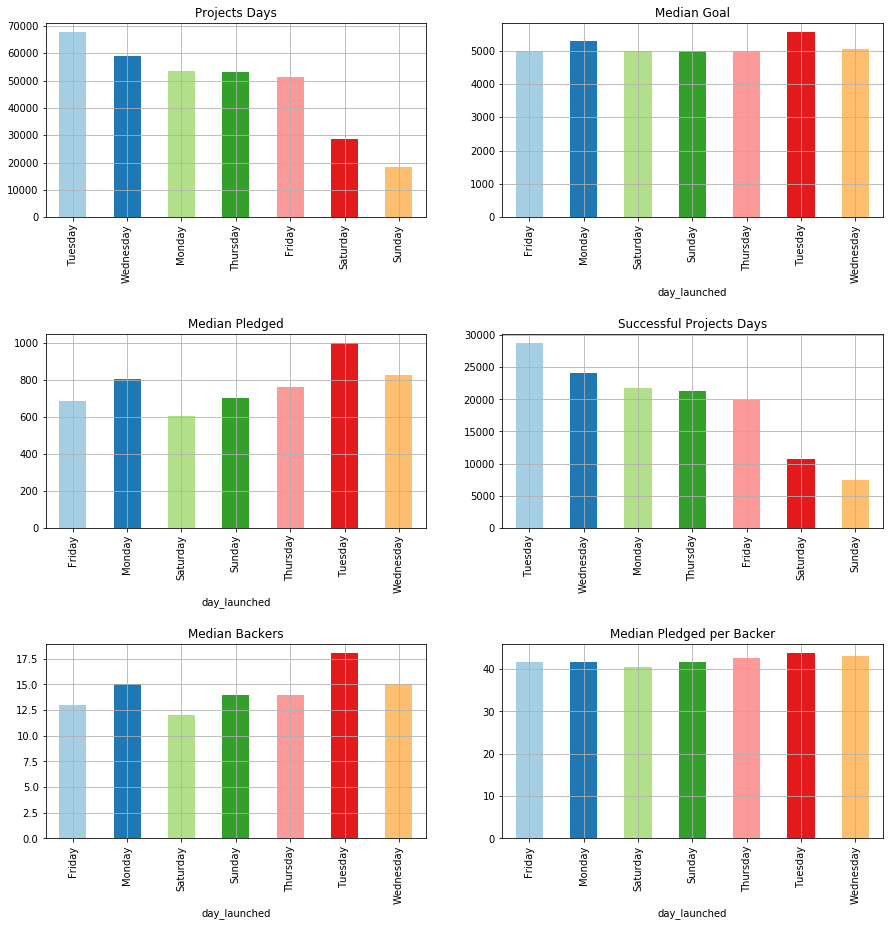

In [56]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axe = axes.ravel()

projects_days_distribution = df_kaggel_2018["day_launched"].value_counts()
projects_days_distribution.plot(ax=axe[0], kind='bar', label='index', title ='Projects Days', grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('day_launched').usd_goal_real.median().plot(ax=axe[1], kind='bar', title ="Median Goal", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('day_launched').usd_pledged_real.median().plot(ax=axe[2], kind='bar', title ="Median Pledged", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

success_projects = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful'])
success_projects_days = success_projects["day_launched"].value_counts()
success_projects_days.plot(ax=axe[3], kind='bar', title ="Successful Projects Days", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))


df_kaggel_2018.groupby('day_launched').backers.median().plot(ax=axe[4], kind='bar', title ="Median Backers", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('day_launched').pledge_per_backer.median().plot(ax=axe[5], kind='bar', title ="Median Pledged per Backer", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))


fig.subplots_adjust(hspace=0.6)
plt.show()

#### Project Launch Month¶
1. The most popular months for project launch are September, October, November, and the least popular are July and January.
2. Fall is popular time for all projects activities and July and January are the least active months for all activities around projects success. 
3. Median goal sizes are similar throughout the year.
4. The best month to launch in is October. It's demonstrating the highest median amount pledged per project, ine of the the highest amount of successful projects, the highest number of backers per project.

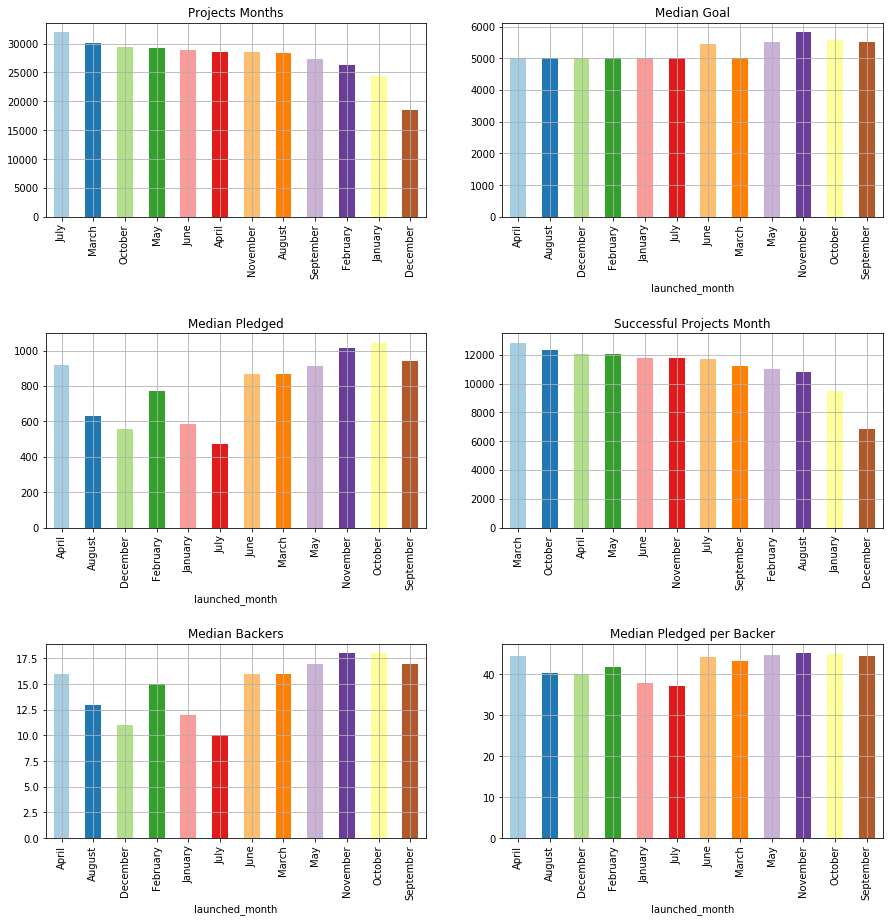

In [237]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axe = axes.ravel()

projects_month_distribution = df_kaggel_2018["launched_month"].value_counts()
projects_month_distribution.plot(ax=axe[0], kind='bar', label='index', title ='Projects Months', grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('launched_month').usd_goal_real.median().plot(ax=axe[1], kind='bar', title ="Median Goal", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

df_kaggel_2018.groupby('launched_month').usd_pledged_real.median().plot(ax=axe[2], kind='bar', title ="Median Pledged", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))

success_projects_days = success_projects["launched_month"].value_counts()
success_projects_days.plot(ax=axe[3], kind='bar', title ="Successful Projects Month", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))


df_kaggel_2018.groupby('launched_month').backers.median().plot(ax=axe[4], kind='bar', title ="Median Backers", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))
df_kaggel_2018.groupby('launched_month').pledge_per_backer.median().plot(ax=axe[5], kind='bar', title ="Median Pledged per Backer", grid=True, color=plt.cm.Paired(np.arange(len(main_category_2018))))


fig.subplots_adjust(hspace=0.6)
plt.show()

#### Launch Time 
1. The most number of projects launched is between 4-6pm (GMT) - 8-10am PST.

Text(0.5, 1.0, 'Campaign Launch Distributoion by hour')

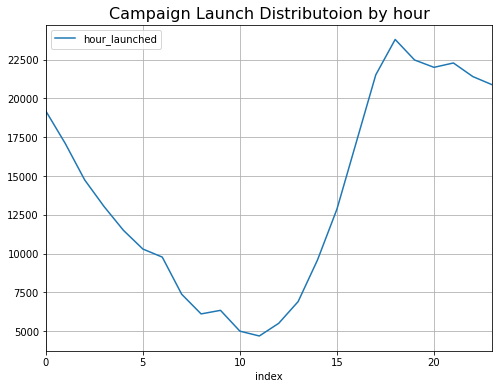

In [98]:
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
#axe = axes.ravel()

launched_hour = df_kaggel_2018['hour_launched'].value_counts()
launched_hour = launched_hour.reset_index()
launched_hour = launched_hour.sort_values(by=['index'])
ax = launched_hour.plot(x = 'index', y=['hour_launched'], figsize = (8,6), grid=True) 
ax.set_ylabel = ('Projects Number')
ax.set_xlabel = ("Hour")
ax.set_title('Campaign Launch Distributoion by hour', fontsize=16)

In [79]:
df_kaggel_2018.head(1)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,...,usd_goal_real,pledge_per_backer,launched_at,deadline_2,campaign_number_days,launched_month,deadline_day,day_launched,number_days,hour_launched
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,...,1533.95,0.0,2015-08-11,2015-10-09,59 days,August,Friday,Tuesday,59,12


#### Campaign Length for Successful Projects 
1. The shortest campaign length was 1 days and the longest campaign length was 92 days
2. Based on given stats we can see that the most number of successful projects have a campaign length of about 30 days 

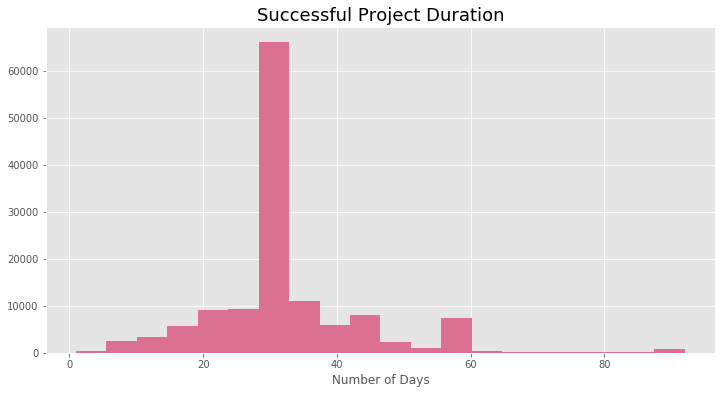

In [351]:
plt.figure(figsize=(12,6))
plt.hist(df_kaggel_2018[df_kaggel_2018.state=='successful'].number_days, bins=20, color=['palevioletred'])
plt.title('Successful Project Duration', fontsize =18)
plt.xlabel('Number of Days')
plt.ylabel('');


In [352]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
#axe = axes.ravel()

length = (df_kaggel_2018[df_kaggel_2018.state=='successful'].number_days, bins=20, color=['palevioletred'])
length.plot(color=['lightsteelblue', 'palevioletred'], kind='hist', grid=True, legend=False, label='index', fontsize=12)
state_2018.reset_index()
ax.set_facecolor('oldlace')


plt.show()

SyntaxError: invalid syntax (<ipython-input-352-4fd097bc22a8>, line 4)

In [97]:
min_days = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful']).number_days.min()
max_days = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful']).number_days.max()
print("\nThe shortest campaign length was {} days and the longest campaign length was {} days".format(min_days, max_days))
#('{0} and {1}'.format('spam', 'eggs'))

#print("\nThe total amount of money that projects have aimed to raise is ${0:,.0f}".format(df_kaggel_2018.usd_goal_real.sum()))

#total amount of money pledged by backers is ${0:,.0f}".format(df_kaggel_2018.usd_pledged_real.sum()))


The shortest campaign length was 1 days and the longest campaign length was 92 days


In [323]:
ttest_onesided([np.log(df_kaggel_2018['usd_goal_real']+1), success])

NameError: name 'ttest_onesided' is not defined

In [324]:
df_failed = df_kaggel_2018[df_kaggel_2018["state"] == "failed"].sample(10000, replace=True)
df_sucess = df_kaggel_2018[df_kaggel_2018["state"] == "successful"].sample(10000, replace=True)

In [325]:
df_failed.head(1)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd_goal_real,launched_at,deadline_2,campaign_number_days,number_days,launched_month,deadline_day,day_launched,pledge_per_backer,pledged_per_backer
353917,872939827,50's - 60's Musical Revue with skits,Theater,Theater,USD,2015-03-18,5000.0,2015-02-25 20:37:04,0.0,failed,...,5000.0,2015-02-25,2015-03-18,21 days,21,February,Wednesday,Wednesday,0.0,0.0


In [ ]:
def ttest_onesided(cols, alpha = 0.05):
    """
    
    cols: list with the , we will test the mean of the population and the sample mean
    
    H0:
    The null Hypothesis is that the both distributions are the same
    ### is that successful projects have smaller goal 
    H1:
    The alternative hypothesis is that the distributions are different
    ## alt is that 
    """
    pop_mean = cols[0].mean()
    sample = cols[1]
    
    print(f"Mean of Population: {pop_mean} \nMean of Sample: {sample.mean()}")
    ttest_val, pval = stats.ttest_1samp(sample, pop_mean)

    print(f"t-test value: {ttest_val}")
    print("Comparing p_value by...\n")
    print(f'p-value result: {pval}')
    if pval < alpha:    # alpha value is 0.05 or 5%
       print(" we are rejecting null hypothesis")
    else:
      print("we are accepting null hypothesis")
    

    ttest_onesided([np.log(df_kick['usd_goal_real']+1), success])

In [ ]:
def ttest_twosided(cols, alpha = 0.05):
    sample1 = cols[0]
    sample2 = cols[1]
    print(f"Mean of Sample 1: {sample1.mean()} \nMean of Sample 2: {sample2.mean()}")    
    ttest_val, pval = stats.ttest_ind(sample1, sample2)

    print(f"t-test value: {ttest_val}")
    # print("Comparing p_value by...\n")
    print(f'p-value result: {pval}')
    if pval < alpha:    # alpha value is 0.05 or 5%
       print(" we are rejecting null hypothesis")
    else:
      print("we are accepting null hypothesis")
    
    
ttest_twosided([failed, success], alpha=.01)

In [332]:
sample1 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'successful']).usd_goal_real.mean()
sample2 = (df_kaggel_2018.loc[df_kaggel_2018['state'] == 'failed']).usd_goal_real.mean()

In [333]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [330]:
ttest_val, pval = stats.ttest_ind(median_goal_success_2018, median_goal_success_2018)

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [335]:
welch_test_statistic(sample1, sample2)

TypeError: object of type 'float' has no len()